In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

In [25]:
apc_data = pd.read_csv('states_all.csv')

In [26]:
apc_data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [42]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = apc_data["STATE"].unique()

for state in states:
    apc_data.loc[apc_data["STATE"] == state, fill_list] = apc_data.loc[apc_data["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
apc_data.dropna(inplace=True)

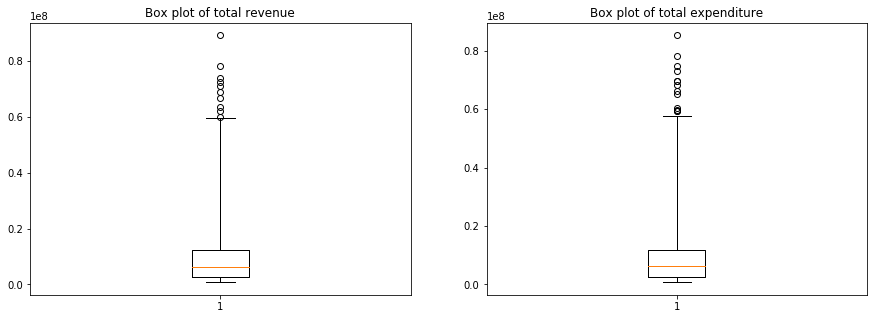

In [43]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(apc_data["TOTAL_REVENUE"], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(apc_data["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()


As we see from the boxplots, both variables have outlier values.

In [44]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(apc_data["TOTAL_REVENUE"], (0, 0.05))

winsorized_expenditure = winsorize(apc_data["TOTAL_EXPENDITURE"], (0, 0.05)) 

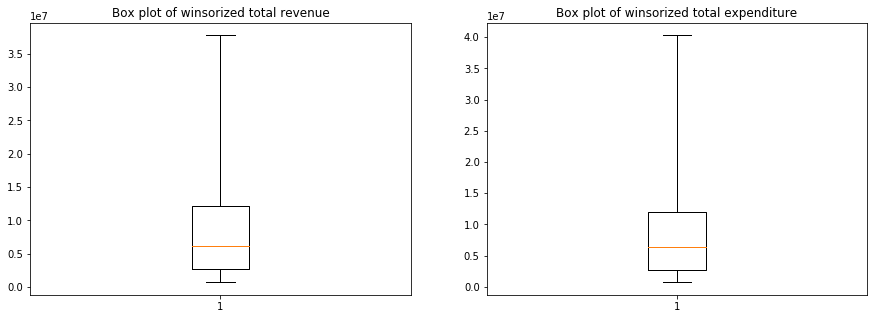

In [45]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.title("Box plot of winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)
plt.title("Box plot of winsorized total expenditure")
plt.show()

outliers are eliminated after the winsorization.

In [46]:
budget_deficit = apc_data.TOTAL_REVENUE - apc_data.TOTAL_EXPENDITURE

Text(0.5, 1.0, 'Box plot of budget deficit')

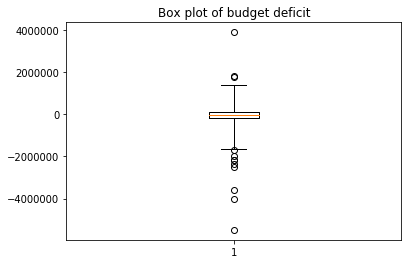

In [47]:
plt.boxplot(budget_deficit, whis = 5)
plt.title("Box plot of budget deficit")

In [48]:
winsorized_budget = winsorize(budget_deficit, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot of budget deficit')

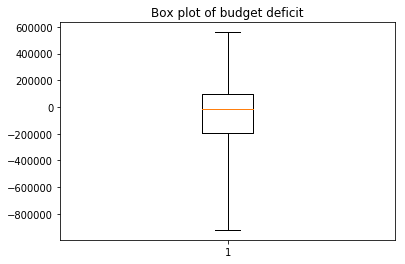

In [50]:
plt.boxplot(winsorized_budget, whis = 5)
plt.title("Box plot of budget deficit")

outliers are eliminated.

In [51]:
budget_deficit2 = winsorized_revenue - winsorized_expenditure

Text(0.5, 1.0, 'Box plot of budget deficit 2')

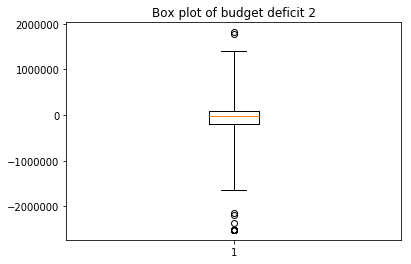

In [52]:
plt.boxplot(budget_deficit2, whis = 5)
plt.title("Box plot of budget deficit 2")

In [53]:
winsorized_budget2 = winsorize(budget_deficit2, (0.05, 0.05))

Text(0.5, 1.0, 'Box plot of budget deficit 2')

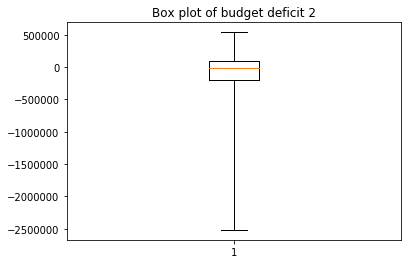

In [57]:
plt.boxplot(winsorized_budget2, whis = 8)
plt.title("Box plot of budget deficit 2")

In [58]:
pd.DataFrame({"original_budget": budget_deficit, "winsorized_budget1": winsorized_budget,
              "winsorized_budget2": winsorized_budget2}).describe()

,original_budget,winsorized_budget1,winsorized_budget2
count,4.660000e+02,466.000000,4.660000e+02
mean,-8.329761e+04,-61210.328326,-1.736360e+05
std,6.148962e+05,342588.030357,6.502740e+05
min,-5.487742e+06,-921134.000000,-2.518429e+06
25%,-1.965748e+05,-196574.750000,-2.047750e+05
50%,-1.282350e+04,-12823.500000,-1.460050e+04
75%,9.852350e+04,98523.500000,9.184800e+04
max,3.897129e+06,560511.000000,5.400550e+05


The differences imply that chosing the outlier elimination strategy is very critical as it substantially affects the statistics of the variables!